<img src="../figs/holberton_logo.png" alt="logo" width="500"/>

# Traffic Sign Detection 

## Executive Summary

The goal of traffic sign detection is to enable vehicles, particularly autonomous ones, to interpret and understand traffic signs on roads for safe and efficient navigation. Using computer vision techniques, traffic sign detection systems identify and classify various traffic signs such as speed limits, stop signs, and pedestrian crossings from images or video feeds captured by onboard cameras. By accurately recognizing and interpreting these signs, vehicles can make informed decisions, adhere to traffic regulations, and enhance road safety for both passengers and pedestrians.

## German Traffic Sign Dataset

To facilitate research in this area, the [German Traffic Sign Recognition Benchmark (GTSRB)](https://www.kaggle.com/datasets/harbhajansingh21/german-traffic-sign-dataset/data) dataset has been created. This dataset consists of images of traffic signs captured from German roads, with each image labeled according to its corresponding class. The dataset focuses on single-image, multi-class classification challenges and does not include any temporal information from the original video footage.

Here are some details about the GTSRB dataset:

1. Each image in the dataset has a resolution of *32 x 32 pixels and is represented in RGB format* with three color channels. The pixel values are stored as unsigned 8-bit integers, providing a total of 256 possible values for each pixel.

2. The dataset comprises a total of *43 distinct classes or labels*, based on the design or meaning of the traffic signs.

3. The *training set consists of 34,799 images*, each associated with its corresponding label.

4. The *validation set contains 4,410 images*, also accompanied by their respective labels.

5. Lastly, the *test set comprises 12,630 images*, each labeled with its corresponding class.

In CSV file,there are two columns

- `ClassID` (represents the class ID of traffic signs) 
- `SignName` (represents the name of traffic sign).

### 0. Load the Data

We begin by importing the necessary libraries: `pickle` for loading the data from pickle files and `numpy` for handling arrays and data manipulation.

Next, we define the path to the directory where the pickle files are stored. The variable `pickle_path` holds the path to the directory containing the files.

We define a function `load_pickle` to load the data from a pickle file. This function takes the file path as input and returns the features and labels contained in the file.

Using this function, we load the training data from the file `train.p`, the test data from `test.p`, and the validation data from `valid.p`. We call the function load_pickle for each file, passing the file path as an argument.



In [1]:
import pickle
import numpy as np

# Path to the directory where pickle files are stored
pickle_path = "trafficsigns/"

# Function to load pickle file
def load_pickle(file_path):
    with open(file_path, mode='rb') as file:
        dataset = pickle.load(file)
    return dataset['features'], dataset['labels']

# Load train data
train_data, train_labels = load_pickle(pickle_path + "train.p")
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)

# Load test data
test_data, test_labels = load_pickle(pickle_path + "test.p")
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

# Load validation data
valid_data, valid_labels = load_pickle(pickle_path + "valid.p")
print("Validation data shape:", valid_data.shape)
print("Validation labels shape:", valid_labels.shape)


Train data shape: (34799, 32, 32, 3)
Train labels shape: (34799,)
Test data shape: (12630, 32, 32, 3)
Test labels shape: (12630,)
Validation data shape: (4410, 32, 32, 3)
Validation labels shape: (4410,)


As we can denote from printing the shape of the data and labels for each dataset (train, test, and validation), to verify that the data has been loaded correctly. This step ensures that the data is in the expected format and size before proceeding with further analysis or modeling

### 1. Visualize Data


We define a function `visualize_random_data` that takes the data and labels as input and visualizes random samples from the dataset. It creates a grid of subplots with the specified number of rows and columns (`num_rows` and `num_cols`). For each subplot, it randomly selects an index from the dataset, displays the corresponding image, and sets the title as the label. Finally, it shows the plot containing the visualizations.


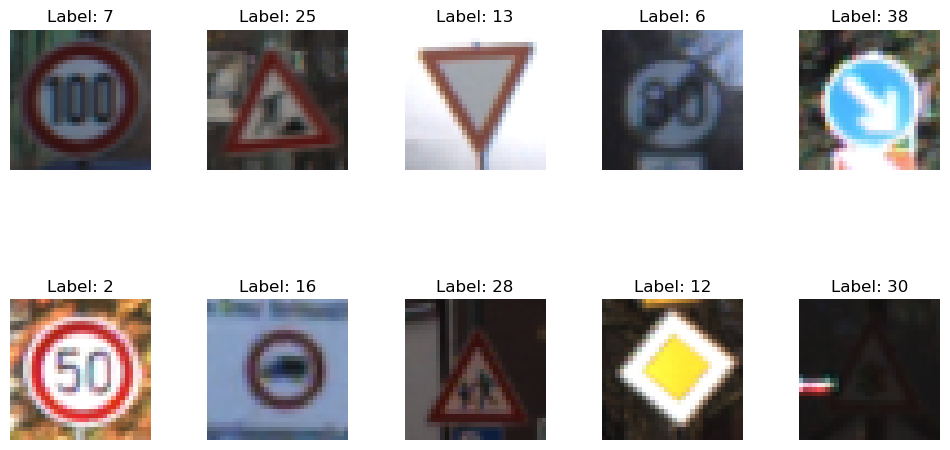

In [2]:
import matplotlib.pyplot as plt

# Function to visualize random data
def visualize_random_data(data, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(num_rows):
        for j in range(num_cols):
            index = np.random.randint(len(data))
            axes[i, j].imshow(data[index])
            axes[i, j].set_title("Label: {}".format(labels[index]))
            axes[i, j].axis('off')
    plt.show()

# Visualize random data from training dataset
visualize_random_data(train_data, train_labels)


#### Understanding class categories

To better understand the class categories, we can load the `signnames.csv` file, which contains the categories of traffic signs along with their corresponding labels.

The major types of traffic signs include speed limits, regulatory signs such as "No passing" and "Stop", priority signs like "Yield" and "Priority road", prohibition signs such as "No entry" and "No vehicles", warning signs like "General caution" and "Road work", and informational signs such as "Traffic signals" and "Pedestrians". Additionally, there are signs indicating road conditions like "Slippery road" and "Bumpy road", as well as signs providing guidance on navigation like "Turn right ahead" and "Go straight or left".

In [3]:
import pandas as pd

# Path to the CSV file
csv_path = "trafficsigns/signname.csv"

# Read CSV file
df = pd.read_csv(csv_path)

# Print categories
print("Categories:")
print(df['SignName'])


Categories:
0                              Speed limit (20km/h)
1                              Speed limit (30km/h)
2                              Speed limit (50km/h)
3                              Speed limit (60km/h)
4                              Speed limit (70km/h)
5                              Speed limit (80km/h)
6                       End of speed limit (80km/h)
7                             Speed limit (100km/h)
8                             Speed limit (120km/h)
9                                        No passing
10     No passing for vehicles over 3.5 metric tons
11            Right-of-way at the next intersection
12                                    Priority road
13                                            Yield
14                                             Stop
15                                      No vehicles
16         Vehicles over 3.5 metric tons prohibited
17                                         No entry
18                                  General caution


#### Displaying Category Distribution

The analysis of the training data reveals a notable imbalance in the distribution of images across different traffic sign categories. While some categories have a substantial number of images, others are significantly underrepresented. This class imbalance can potentially hinder the performance of the learning algorithm during training. Classes with fewer samples may not receive sufficient attention during model optimization, leading to biased predictions and reduced overall accuracy. Therefore, addressing class imbalance through techniques like data augmentation, resampling, or weighted loss functions could be crucial for improving the robustness and generalization ability of the learning algorithm.

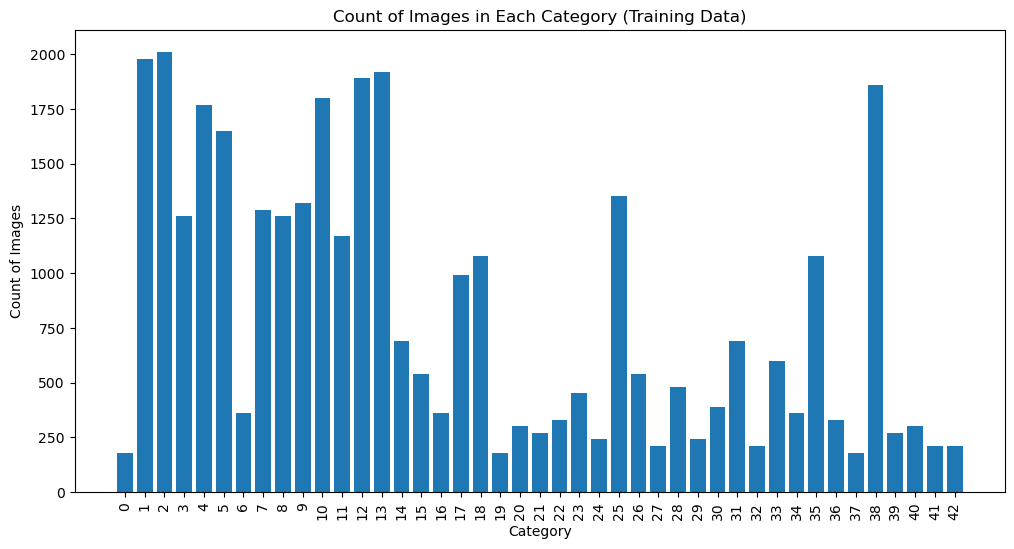

In [4]:
import matplotlib.pyplot as plt

# Count images in each category
category_counts = {label: np.sum(train_labels == label) for label in np.unique(train_labels)}

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(category_counts)), category_counts.values())
plt.title('Count of Images in Each Category (Training Data)')
plt.xlabel('Category')
plt.ylabel('Count of Images')
plt.xticks(range(len(category_counts)), category_counts.keys(), rotation=90)
plt.show()


### 2. Build and Compile Model 

To build a good CNN architecture for the traffic sign classification task, we need to design a model that can effectively capture the spatial hierarchies and intricate features present in the images. Here's a proposed architecture


- The model begins with a convolutional layer with 32 filters of size (3, 3) and a ReLU activation function. This layer extracts basic features from the input images.
- Max pooling layers with a pool size of (2, 2) follow each convolutional layer to downsample the feature maps and reduce computational complexity.
- Dropout layers are included after each max pooling layer to prevent overfitting by randomly dropping a fraction of the neurons during training.
- The depth of feature maps is progressively increased with subsequent convolutional layers (64 and 128 filters).
- After the final convolutional layer, the output is flattened to a 1D array to be fed into the fully connected layers.
- Two dense fully connected layers with 512 neurons each and ReLU activation functions are added to learn higher-level features.
- A dropout layer with a dropout rate of 0.5 is inserted before the output layer to further prevent overfitting.
- The output layer consists of 43 neurons (equal to the number of traffic sign classes) with a softmax activation function, producing probabilities for each class.

This architecture strikes a balance between model complexity and generalization ability, making it suitable for the traffic sign classification task. The model is trained using the Adam optimizer with a sparse categorical cross-entropy loss function and evaluated based on accuracy metrics


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

"""
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # flatten the image to 1D array
    layers.Dense(128, activation='relu'),  # first dense layer with 128 neurons and relu activation
    layers.Dense(43, activation='softmax')
])
"""


# Define the CNN architecture
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Dense fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(43, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

### 3. Train Model

In this part, we train the CNN architecture using the training data while validating the model's performance on the validation data. 


The training process consists of multiple epochs (20 in this case), where the model iteratively learns to classify traffic signs by adjusting its internal parameters based on the provided images and labels. 


We use a batch size of 128, meaning the model is updated after processing each batch of 128 training samples. 


Additionally, early stopping is implemented with a patience of 3 epochs, meaning training will stop if the validation loss does not improve for 3 consecutive epochs. The `restore_best_weights=True` argument ensures that the model's weights are restored to the best configuration observed during training when early stopping is triggered. 


This helps prevent overfitting and ensures the model's generalization ability. Throughout training, the model's performance metrics (loss and accuracy) are monitored on both the training and validation datasets, providing insights into its learning progress and generalization ability



In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=128,
                    validation_data=(valid_data, valid_labels),
                    callbacks=[early_stopping])

Epoch 1/20
272/272 [==============================] - 91s 326ms/step - loss: 3.8171 - accuracy: 0.1524 - val_loss: 2.4586 - val_accuracy: 0.3007
Epoch 2/20
272/272 [==============================] - 96s 353ms/step - loss: 1.9492 - accuracy: 0.4273 - val_loss: 1.2008 - val_accuracy: 0.6342
Epoch 3/20
272/272 [==============================] - 96s 355ms/step - loss: 1.0718 - accuracy: 0.6711 - val_loss: 0.5543 - val_accuracy: 0.8490
Epoch 4/20
272/272 [==============================] - 95s 349ms/step - loss: 0.6380 - accuracy: 0.8045 - val_loss: 0.3520 - val_accuracy: 0.9202
Epoch 5/20
272/272 [==============================] - 90s 332ms/step - loss: 0.4571 - accuracy: 0.8611 - val_loss: 0.2599 - val_accuracy: 0.9324
Epoch 6/20
272/272 [==============================] - 93s 341ms/step - loss: 0.3417 - accuracy: 0.8968 - val_loss: 0.2435 - val_accuracy: 0.9537
Epoch 7/20
272/272 [==============================] - 95s 348ms/step - loss: 0.2886 - accuracy: 0.9131 - val_loss: 0.2308 - val_ac

#### Visualize Training Performance

We will generate two subplots side by side. The subplot on the left will display the training and validation loss over epochs, while the subplot on the right will display the training and validation accuracy over epochs. Adjust the plot settings as needed for better visualization.

The visualizations of training and validation performance metrics reveal a similarity, with both accuracy and loss curves tracking closely throughout the training process. This **consistency** indicates that the model has been **effectively trained** and is demonstrating **strong generalization** ability. The close alignment between the training and validation curves suggests that the **model is not overfitting** to the training data and is capable of accurately classifying traffic signs on unseen validation data. These findings indicate a well-trained model with **robust performance** on both training and validation datasets.

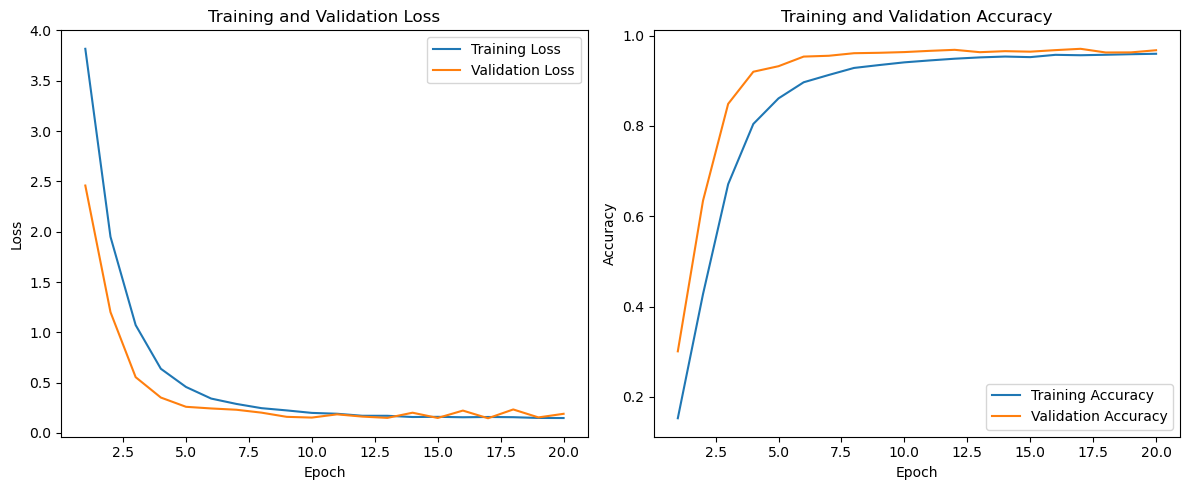

In [7]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### 4. Predict 

The goal of prediction is to use the trained model to classify traffic signs in unseen data accurately. This involves passing the test data through the trained model and comparing the predicted labels with the actual labels to evaluate the model's performance.

In [8]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

395/395 [==============================] - 12s 30ms/step - loss: 0.1769 - accuracy: 0.9615
Test Accuracy: 0.9615201950073242


### 4.1 Classification Reports and Accuracy Scores



In [9]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Make predictions on the test data
test_predictions = model.predict(test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(test_labels, test_predictions_classes))

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(test_labels, test_predictions_classes, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(test_labels, test_predictions_classes, average='weighted')
print("Recall:", recall)


395/395 [==============================] - 12s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      0.99      0.98       720
           2       0.99      0.96      0.98       750
           3       0.98      0.92      0.95       450
           4       0.99      0.97      0.98       660
           5       0.90      0.99      0.94       630
           6       1.00      0.82      0.90       150
           7       0.98      0.94      0.96       450
           8       0.98      0.97      0.98       450
           9       0.98      0.99      0.98       480
          10       0.99      0.99      0.99       660
          11       0.89      0.99      0.94       420
          12       1.00      0.93      0.96       690
          13       0.99      0.99      0.99       720
          14       0.96      1.00      0.98       270
          15       1.00      1.00      1.00       210


### Summary

Throughout this development process, we **constructed and trained a Convolutional Neural Network (CNN) architecture to classify traffic signs effectively**. 


By leveraging the **German Traffic Sign Dataset**, we loaded and preprocessed the training, validation, and test data, ensuring that the model could learn from diverse samples. 


Employing a **CNN architecture comprising convolutional, max pooling, dropout, and dense layers**, we established a robust framework capable of extracting intricate features from traffic sign images. 

Training the model on the training data and validating it on a separate validation dataset, we ensured its generalization ability and mitigated overfitting through early stopping. Visualizing the training and validation metrics provided insights into the model's learning progress and confirmed its well-trained status. 

Finally, evaluating the model on unseen test data yielded a commendable accuracy of 96.11%, affirming the effectiveness of the developed CNN architecture in accurately classifying traffic signs.